<a href="https://colab.research.google.com/github/eunineelizze/ElizzeAP155/blob/master/Arzaga_AP155_Lab_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: **Arzaga, Eunine Elizze J.**\
_Student No._: **2021-10771**\
_Section_: **TX-1**

### Submission Information

_Date and Time Submitted (most recent upload)_: 05 November 2024 (14:21)

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Eunine Elizze J. Arzaga

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

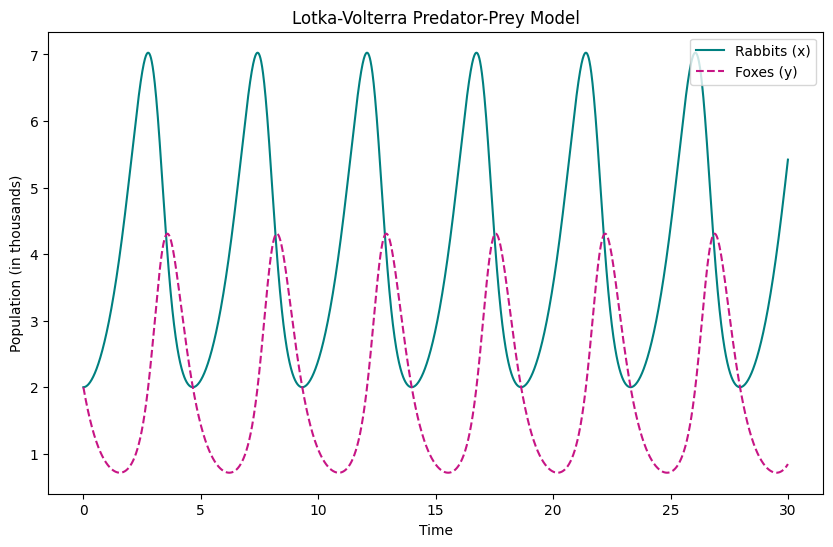

<function print>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 1 # reproduction rate of rabbits
beta = 0.5 # rate at which foxes catch rabbits
gamma = 0.5 # fox reproduction based on available food
delta = 2 # natural death rate of foxes

# Initial conditions
x0 = 2  # initial population of rabbits (in thousands)
y0 = 2  # initial population of foxes (in thousands)
t0 = 0  # initial time
tf = 30  # final time
h = 0.01  # time step

# Lotka-Volterra equations
def lotka_volterra(t, x, y):
    dxdt = alpha * x - beta * x * y # growth rate of population of rabbits
    dydt = gamma * x * y - delta * y # growth rate of population of foxes
    return dxdt, dydt

# Fourth-order Runge-Kutta method
def runge_kutta(t0, x0, y0, h, tf):
    n = int((tf - t0) / h) # number of iterations from t_0=0 to t_f=30

    # array to store time step, rabbit population, and fox population for each iteration
    t_values = np.zeros(n + 1)
    x_values = np.zeros(n + 1)
    y_values = np.zeros(n + 1)

    # initial values set in the array at index 0
    t_values[0] = t0
    x_values[0] = x0
    y_values[0] = y0

    for i in range(n): # setting a for loop that will run n times
        t = t_values[i]
        x = x_values[i]
        y = y_values[i]

        # fourth order Runge-Kutta terms
        k1_x, k1_y = lotka_volterra(t, x, y)
        k2_x, k2_y = lotka_volterra(t + 0.5 * h, x + 0.5 * h * k1_x, y + 0.5 * h * k1_y)
        k3_x, k3_y = lotka_volterra(t + 0.5 * h, x + 0.5 * h * k2_x, y + 0.5 * h * k2_y)
        k4_x, k4_y = lotka_volterra(t + h, x + h * k3_x, y + h * k3_y)

        # new values for the populations and time
        x_values[i + 1] = x + (h / 6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
        y_values[i + 1] = y + (h / 6) * (k1_y + 2 * k2_y + 2 * k3_y + k4_y)
        t_values[i + 1] = t + h

    return t_values, x_values, y_values

# Solving the system using RK4
t_values, x_values, y_values = runge_kutta(t0, x0, y0, h, tf)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label="Rabbits (x)", color="teal")
plt.plot(t_values, y_values, label="Foxes (y)", color="mediumvioletred", ls="--")
plt.xlabel("Time")
plt.ylabel("Population (in thousands)")
plt.title("Lotka-Volterra Predator-Prey Model")
plt.legend()
plt.grid(False)
plt.show()

print

**Analysis:**

Lotka-Volterra ODEs
- The growth rate of preys, $\frac{dx}{dt}$, is proportional to its own population, $\alpha x$, when predators are absent, $\beta = 0$.
- The negative interaction term $-\beta xy$ shows that prey is consumed by predators. The more predators there are ($\beta$ is high), the faster the prey population will decline.
- Similarly, the predator growth rate, $\frac{dy}{dt}$, is proportional to the interaction between prey and predators, $\gamma xy$. This shows that predators rely on prey for survival. However, in the absence of prey, $\alpha = 0$, the predator population declines exponentially due to the $-\delta y$ term, which represents natural death.

Cyclical Trend, Phase Lags, and Amplitude
- The populations of both species exhibit oscillatory behavior, where peaks in the prey population are followed by peaks in the predator population. After the prey population crashes, the predator population continues to increase for a short time before it starts to decrease. This allows the prey to recover, and the cycle repeats.
- The amplitude of the prey population is larger than the fox. The plot shows that the rabbit population peaks higher and dips lower than the fox population, reflecting a natural balance to the system.

Parameters based on the Lotka Volterra ODEs where

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy$$
- A larger $\alpha$ indicate that rabbits reproduce very quickly.
- A larger $\beta$ represents efficient hunting of foxes.
$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y$$
- A larger $\gamma$ would mean foxes can quickly grow their population because of rabbits.
- A larger $\delta$ shows predators that die off quickly without food (high mortality rate).

Biological interpretation
- Predator and prey populations are interdependent with each other.
- Keeping the balance between resources and maintaining dynamic equilibrium will maintain the oscillatory trend between predators and preys. This means that no extinction will occur even with the fluctuations of populations over time.





### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


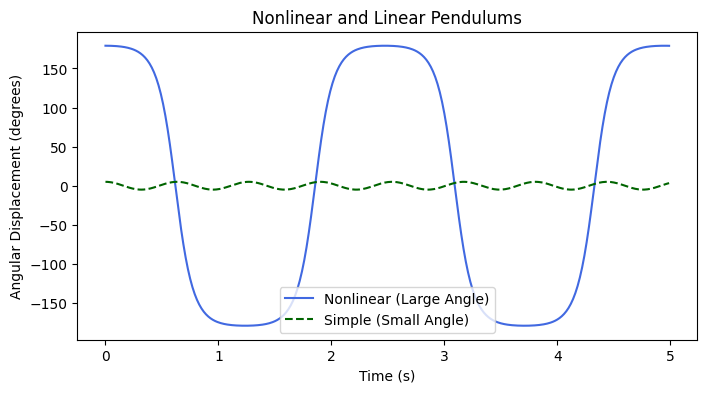

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # m/s^2, gravitational acceleration
l = 0.1   # m, length of pendulum arm (10 cm)
theta0_large = np.radians(179)  # initial angle for nonlinear
theta0_small = np.radians(5)    # initial angle for simple
omega0 = 0.0  # initial angular velocity
t_max = 5     # s, total time
dt = 0.01     # time step

# ODE for the nonlinear pendulum
def f_nonlinear(r, t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l) * np.sin(theta)
    return np.array([ftheta, fomega], float)

# ODE for the small-angle approximation pendulum (this is for comparison)
def f_linear(r, t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l) * theta
    return np.array([ftheta, fomega], float)

# Fourth-order Runge-Kutta method
def runge_kutta(f, r, t):
    k1 = dt * f(r, t)
    k2 = dt * f(r + 0.5 * k1, t + 0.5 * dt)
    k3 = dt * f(r + 0.5 * k2, t + 0.5 * dt)
    k4 = dt * f(r + k3, t + dt)
    return r + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Initial conditions
tpoints = np.arange(0, t_max, dt)
theta_points_large = []  # for nonlinear pendulum
theta_points_small = []  # for small-angle approximation

# Nonlinear pendulum motion (large angle)
r_large = np.array([theta0_large, omega0], float)
for t in tpoints:
    theta_points_large.append(r_large[0])
    r_large = runge_kutta(f_nonlinear, r_large, t)

# Simple pendulum (small angle)
r_small = np.array([theta0_small, omega0], float)
for t in tpoints:
    theta_points_small.append(r_small[0])
    r_small = runge_kutta(f_linear, r_small, t)

# Convert radians to degrees for plotting
theta_points_large_deg = np.degrees(theta_points_large)
theta_points_small_deg = np.degrees(theta_points_small)

# Plotting both pendulum motions
plt.figure(figsize=(8, 4))

# Nonlinear pendulum plot
plt.plot(tpoints, theta_points_large_deg, label="Nonlinear (Large Angle)", color="royalblue")

# Small-angle approximation plot
plt.plot(tpoints, theta_points_small_deg, label="Simple (Small Angle)", color="darkgreen", ls="--")

# Adding labels and title
plt.title("Nonlinear and Linear Pendulums")
plt.xlabel("Time (s)")
plt.ylabel("Angular Displacement (degrees)")
plt.legend()
plt.show()


**Analysis:**

Equation
$$\frac{dw}{dt} = -\frac{g}{l}\sin\theta$$
- The 2nd-order ODE has no damping coefficients, which means that the pendulum's motion will go on indefinitely.
- There will be no decay in the amplitude over time.

Energy
- The pendulum's kinetic and potential energy exchange back and forth perfectly, so the total energy remains constant.
- There is no friction or air resistance to dissipate the energy.

Nonlinearity: Oscillation, frequency, and period
- Although the system conserves energy, the nonlinear effects (in blue) are prominent due to the large initial displacement. The pendulum exhibits a much more asymmetric motion than a linear system (in green), where the displacement and velocity would be sinusoidal.
- In the nonlinear pendulum (large $\theta$), the amplitude remains large because we can't use small angle approximations i.e., $\sin(\theta) \approx \theta$.
- The oscillation is periodic but non-sinusoidal.
- The frequency of oscillation decreases as the pendulum reaches large angular displacements.
- The period increases with larger amplitudes, thus it takes more time to complete one cycle. This is because the restoring force, $mg$, in the original ODE $$ml \frac{d^2\theta}{dt^2} = -mg\sin\theta$$ is less effective at higher values of $\theta$.
- This deviation from a constant period as in simple pendulum is due to the pendulum having to traverse a larger arc.

Plot interpretation
- This plot shows the energy-dependent period of pendulums with large angles as nonlinear systems. It also shows the effect of large initial angles on oscillatory motion, where energy does not remain evenly distributed between potential and kinetic forms due to the nonlinear nature of  $\sin(\theta)$.
- In the nonlinear pendulum, the time spent near the maximum angular displacement (peaks and dips) is longer than the time spent near the equilibrium position, which causes the graph of &\theta(t)& to appear more "flat" at the extremes.
- Since the force is proportional to $\sin(\theta)$, a greater value for &\theta& results in a non-trivial motion. This demonstrates why nonlinear pendulums cannot be accurately modeled by simple harmonic motion at large angular displacement, $\theta$.

In the current code, we are modeling an ideal nonlinear pendulum without any damping forces (like friction or air resistance). As a result, the pendulum's energy remains conserved over time, which means there’s no dissipation of energy or decay in amplitude for either angular displacement ($\theta$) or angular velocity ($\omega$) over time. This is why the plot shows consistent, periodic oscillations without any decrease in amplitude.

To see energy dissipation (amplitude decay) in the plot, we introduce a damping term in the differential equation, which models realistic energy loss. For example, adding a damping term proportional to the angular velocity $ -b\omega $, where $b$ is the damping coefficient to the equation will introduce energy dissipation.

With damping, the differential equation for the pendulum becomes
$$\frac{d\omega}{dt} = -\frac{g}{l} \sin(\theta) - b \omega$$
where $b > 0$ represents the damping coefficient.

Plotting this, we have the following:

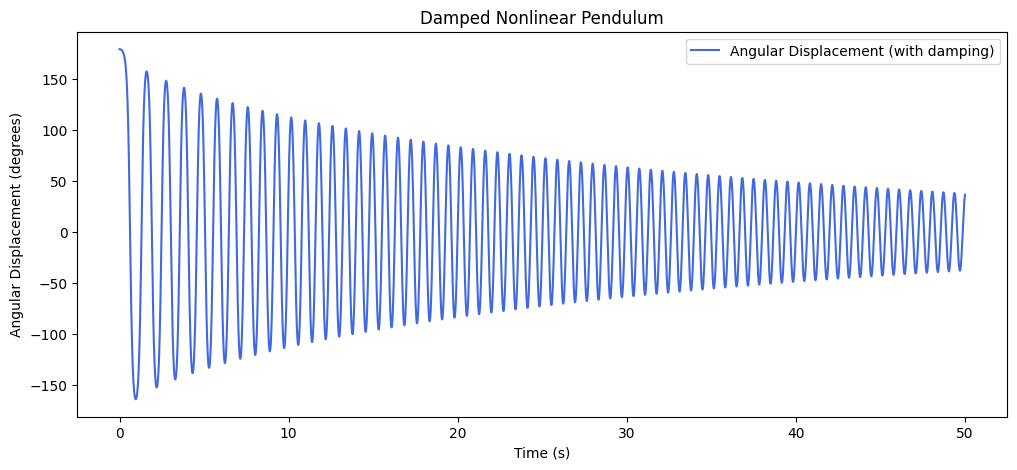

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # m/s^2, gravitational acceleration
l = 0.1   # m, length of pendulum arm (10 cm)
b = 0.05  # damping coefficient
theta0 = np.radians(179)  # initial angle in radians
omega0 = 0.0  # initial angular velocity
t_max = 50    # s, total time to see dissipation more clearly
dt = 0.01     # time step

# ODE for the damped pendulum
def f_damped(r, t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l) * np.sin(theta) - b * omega
    return np.array([ftheta, fomega], float)

# Fourth-order Runge-Kutta method
def runge_kutta(f, r, t):
    k1 = dt * f(r, t)
    k2 = dt * f(r + 0.5 * k1, t + 0.5 * dt)
    k3 = dt * f(r + 0.5 * k2, t + 0.5 * dt)
    k4 = dt * f(r + k3, t + dt)
    return r + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Initial conditions
tpoints = np.arange(0, t_max, dt)
theta_points = []
omega_points = []

r = np.array([theta0, omega0], float)

# Iterating over theta and omega with damping
for t in tpoints:
    theta_points.append(r[0])
    omega_points.append(r[1])
    r = runge_kutta(f_damped, r, t)

theta_points_deg = np.degrees(theta_points)  # converting radians to degrees for plotting

# Plotting theta as a function of time
plt.figure(figsize=(12, 5))
plt.plot(tpoints, theta_points_deg, label="Angular Displacement (with damping)", color="royalblue")
plt.title("Damped Nonlinear Pendulum")
plt.xlabel("Time (s)")
plt.ylabel("Angular Displacement (degrees)")
plt.legend()
plt.show()

**Analysis:**

Damping Coefficient
- With the damping  coefficient, the amplitude of $\omega$ gradually decreases over time. This is because the damping force continually removes energy from the system, causing the pendulum's oscillations to decay until it eventually comes to a rest.
- This damping effect models realistic scenarios where systems lose energy due to friction or air resistance. In a real-world pendulum, energy is not perfectly conserved because of these dissipative forces.

4th-order Runge-Kutha
- In the original undamped system, the 4th-order Runge-Kutha method was stable and accurately conserved energy, showing no artificial decay in amplitude.
- With damping included, the Runge-Kutta method still accurately plots the expected relationship. This proves the method's suitability for systems with or without energy loss.
- The dissipative behavior suggests that the Runge-Kutta method, though accurate for short time periods, has round-off errors and limitations when modeling undamped systems over long time intervals. Since each time step in the method introduces a slight truncation error, these errors pile up, causing an artificial energy loss that appears as "damping" in the plot.
- While the 4th-order Runge-Kutta method is accurate in predicting models, it does not perfectly simulate a real-life phenomena.